# lab 06 - Data preprocessing I
Name: Robb Alexander and Ryan Bailis   
Class: CSCI349    
Semester: 2021SP    
Instructor: Brian King


In [1]:
# Setting things up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1) Use pandas to read in your CSV data file you downloaded above. (You should have placed in your data directory.) Call the data frame df_temps. Read in the entire dataset, however, peek at the dataset first. You'll notice 16 rows of metadata. Ignore the first 16 rows (HINT: Use the skiprows= option!) NOTE: ALWAYS BE SURE TO LOOK AT YOUR ACTUAL DATA BEFORE TRYING TO READ IN A RAW DATASET!

In [2]:
df_temps = pd.read_csv("/Users/rale/Documents/Programming/csci349_2021sp/data/faa_hourly-KIPT_20000101-20201231_raw.csv", skiprows=16)
df_temps.head()

,Date/Time (GMT),Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph),Unnamed: 13
0,2000-01-01 00:00:00,1,26.1,26.1,26.1,14.0,NaN,20.7,59.0,17.3,1015.2,280.0,17.3,NaN
1,2000-01-01 01:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,16.1,1015.9,280.0,16.1,NaN
2,2000-01-01 02:00:00,1,26.1,26.1,26.1,15.1,NaN,NaN,62.0,15.0,1016.3,280.0,15.0,NaN
3,2000-01-01 03:00:00,1,26.1,26.1,26.1,12.0,NaN,NaN,54.0,16.1,1016.6,270.0,16.1,NaN
4,2000-01-01 04:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,12.7,1017.3,280.0,12.7,NaN


#### 2) Report the general structure of the data frame using df_temps.info(). You should notice that almost every variable was read in as a plan object data type. You have a lot of work to do!

In [3]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181943 entries, 0 to 181942
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                181943 non-null  object 
 1   Number of Observations (n/a)   181943 non-null  int64  
 2   Average Temp (F)               180938 non-null  float64
 3   Max Temp (F)                   180938 non-null  float64
 4   Min Temp (F)                   180938 non-null  float64
 5   Average Dewpoint Temp (F)      180816 non-null  float64
 6   1 Hour Precip (in)             30294 non-null   float64
 7   Max Wind Gust (mph)            24708 non-null   float64
 8   Average Relative Humidity (%)  177114 non-null  float64
 9   Average Wind Speed (mph)       181394 non-null  float64
 10  Average Station Pressure (mb)  181647 non-null  float64
 11  Average Wind Direction (deg)   148822 non-null  float64
 12  Max Wind Speed (mph)          

#### 3) Read about the memory_usage() method of pandas data frames. Then, report the total memory in bytes for each variable of df_temps. Set the parameter deep=True, to get the most accurate assessment of your total memory usage. (NOTE – this could take a bit of time to return an answer.)

In [4]:
mem = df_temps.memory_usage(deep=True)
mem

Index                                 128
Date/Time (GMT)                  13827668
Number of Observations (n/a)      1455544
Average Temp (F)                  1455544
Max Temp (F)                      1455544
Min Temp (F)                      1455544
Average Dewpoint Temp (F)         1455544
1 Hour Precip (in)                1455544
Max Wind Gust (mph)               1455544
Average Relative Humidity (%)     1455544
Average Wind Speed (mph)          1455544
Average Station Pressure (mb)     1455544
Average Wind Direction (deg)      1455544
Max Wind Speed (mph)              1455544
Unnamed: 13                       1455544
dtype: int64

#### 4) Report the total memory required for the data frame in MB. (Just sum the previous answer.) You should get an answer showing over a hundred megabytes! Also, store the total as a variable called original_memory. We're going to compare memory after we're done.

In [5]:
original_memory = mem.sum()
original_memory = original_memory / (1<<20)
original_memory #MBs

31.232707977294922

#### 5) You have a rather annoying extra column that was read in in the last column position. (Look closely at the output of `info()` above!) You should always confirm that it's garbage before deleting it. Write the single line of code that reports the count of valid values in the last column (HINT: count())

In [6]:
df_temps.iloc[:,-1].count()

0

#### 6) Drop that last column from df_temps.

In [7]:
df_temps = df_temps.iloc[:,:-1]

#### 7) Look over the data type column in the info() output. ALWAYS pay attention to the types of each variable. In particular, pay attention to the variables that are read in as "object" type. This implies that pandas did not have enough confidence to convert the type itself, and you need to do it. Are there any object types? If so what? What format are the data in that column(s)?

Date/Time (GMT) was read in as a object, it happens since the format is complex and contains special characters such as `:`. The format of the date object always follows YYYY-MM-DD HH:MM:SS. This means we can convert it into a simpler time int/representation.

#### 8) How many NaN values are in each variable? (NOTE: Leave the NaN fields alone! The fact that they are missing is IMPORTANT! And, leave the date/time variable in the first column alone.)

In [8]:
df_temps.isna().sum()

Date/Time (GMT)                       0
Number of Observations (n/a)          0
Average Temp (F)                   1005
Max Temp (F)                       1005
Min Temp (F)                       1005
Average Dewpoint Temp (F)          1127
1 Hour Precip (in)               151649
Max Wind Gust (mph)              157235
Average Relative Humidity (%)      4829
Average Wind Speed (mph)            549
Average Station Pressure (mb)       296
Average Wind Direction (deg)      33121
Max Wind Speed (mph)                549
dtype: int64

#### 9) Report the NaN output as a percentage of the total number of values that are missing for each variable

In [9]:
total = len(df_temps.index)
df_temps.isna().sum() / total * 100

Date/Time (GMT)                   0.000000
Number of Observations (n/a)      0.000000
Average Temp (F)                  0.552371
Max Temp (F)                      0.552371
Min Temp (F)                      0.552371
Average Dewpoint Temp (F)         0.619425
1 Hour Precip (in)               83.349730
Max Wind Gust (mph)              86.419923
Average Relative Humidity (%)     2.654128
Average Wind Speed (mph)          0.301743
Average Station Pressure (mb)     0.162688
Average Wind Direction (deg)     18.204053
Max Wind Speed (mph)              0.301743
dtype: float64

#### 10) Report the number of observations that are complete, meaning, they have NO missing variable in the observation. Report this as a raw number and as a percentage of the total number of observations. Then, clearly state why this is NOT a problem to be concerned about for this particular dataset. (HINT: Which variable(s) contain most of the missing data and why?)

In [10]:
"""
Only 3% of rows are completed, which seems low but
 in reality the missing data is 1 Hour Precip (in)
 and Max Wind Gust (mph). And both of these are
 conditions that do not happen every hour. Rain and
 high winds can only be recorded if it happens.
"""
complete_rows = df_temps.notna().all(axis=1).value_counts()[True]
print("Complete Observations:", complete_rows)
print(complete_rows / total * 100,"%")

Complete Observations: 5552
3.051505141720209 %


#### 11) Look over your data types. By default, most of the time pandas will convert your integer types to a 64-bit integer, and floating point types will use double precision numbers. You can do far better. Read over the pd.to_numeric() function. Did you notice the parameter called downcast? Go back and read about this parameter. Downcast your types accordingly. Then look over the output of info(), and report your latest memory usage in MB.

In [11]:
df_temps['Number of Observations (n/a)'] = pd.to_numeric(df_temps['Number of Observations (n/a)'], downcast='unsigned')
df_temps.iloc[:,2:13] = df_temps.iloc[:,2:13].apply(pd.to_numeric,downcast="float")

df_temps.info()

"""Memory usage shown in info() is 9.2MB"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181943 entries, 0 to 181942
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                181943 non-null  object 
 1   Number of Observations (n/a)   181943 non-null  uint8  
 2   Average Temp (F)               180938 non-null  float32
 3   Max Temp (F)                   180938 non-null  float32
 4   Min Temp (F)                   180938 non-null  float32
 5   Average Dewpoint Temp (F)      180816 non-null  float32
 6   1 Hour Precip (in)             30294 non-null   float32
 7   Max Wind Gust (mph)            24708 non-null   float32
 8   Average Relative Humidity (%)  177114 non-null  float32
 9   Average Wind Speed (mph)       181394 non-null  float32
 10  Average Station Pressure (mb)  181647 non-null  float32
 11  Average Wind Direction (deg)   148822 non-null  float32
 12  Max Wind Speed (mph)          

'Memory usage shown in info() is 9.2MB'

#### 12) How much did our memory footprint improve? (Show the total memory usage using deep=True). Report the total memory usage in MB, and report the percentage improvement

In [12]:
mem = df_temps.memory_usage(deep=True)
new_memory = mem.sum()
new_memory = new_memory / (1<<20)
print("New memory:", new_memory, "MBs")

print("Memory we saved:", original_memory - new_memory, "MBs")

New memory: 20.995360374450684 MBs
Memory we saved: 10.237347602844238 MBs


#### 13) There are four primary classes in pandas for working with dates and times? Consider the Scalar Class for each, and state what concept each is representing. (Again, if you think you are going to be working with data in your future, make some good notes for yourself here!)

Date time:<br>
This is the Timestamp scalar type. This is a specific date and the time in the day for a specified timezone. Comparable to python's datetime representation.

Time deltas:<br>
This is the Timedelta scalar type. This is a time duration between two points. It can be represented in hours, days, minutes etc. This is also seen in python's timedelta object.

Time spans:<br>
This is the Period scalar type. It is the time duration that has a specified moment/moments and the period of time change, which can be a month, minute etc. You can do arithmetic to increment by the period specified.

Date offsets:<br>
This is the DateOffset scalar type. This is the time frame that has calendar functionality, this makes it easy to do arithmetics without breaking calendar rules. This is also a duration of time.

#### 14) For each above, state the primary creation method used to create each type of data

Date time:<br>
pd.Timestamp("2012-05-01")<br>
pd.Timestamp(2012, 5, 1)<br>
pd.Timestamp(datetime.datetime(2012, 5, 1))

Time deltas:<br>
pd.Timedelta("1s")

Time spans:<br>
pd.Period("2012", freq="A-DEC")<br>
pd.Period("2012-1-1", freq="D")

Date offsets:<br>
pd.DateOffset(months=2)<br>
pd.DateOffset(weekday=MO(2))


#### 15) Create a Timestamp object from the string "07/04/19", which is a date representing July 4, 2019. Store the object as d1 and show it.

In [13]:
d1 = pd.Timestamp("2019-07-04")
d1

Timestamp('2019-07-04 00:00:00')

#### 16) Using d1 and string formatting codes, print the string from d1: "Today's date is Thursday, July 4, 2019".

In [14]:
print("Today's date is", d1.strftime("%A, %B %d, %Y"))

Today's date is Thursday, July 04, 2019


#### 17) Create another Timestamp object representing Sept 7, 2019 at 3pm, called d2. Report it

In [15]:
d2 = pd.Timestamp("2019-09-07 15:00")
d2

Timestamp('2019-09-07 15:00:00')

#### 18) Subtract d2 – d1, and report the difference as the number of days and seconds between these two. Also report the difference as total seconds. (NOTE: The difference should be 65 days, 54000 seconds. Or 5670000 total seconds.)

In [16]:
diff = d2 - d1
print(diff.days, "days,", diff.seconds, "seconds")
print(diff.total_seconds(), "total seconds")

65 days, 54000 seconds
5670000.0 total seconds


#### 19) Create a new Timestamp object from the string "2019-07-01 08:30pm", but localize the time stamp to represent the time in the US Eastern Time Zone. Store the result as d3 and output it.

In [17]:
d3 = pd.Timestamp("2019-07-01 20:30").tz_localize("US/Eastern")
d3

Timestamp('2019-07-01 20:30:00-0400', tz='US/Eastern')

#### 20) Show time represented by d3, but converted to the US / Pacific Time Zone. The time reported should be three hours earlier than EST shown in the previous question.

In [18]:
d3.tz_convert("US/Pacific")

Timestamp('2019-07-01 17:30:00-0700', tz='US/Pacific')

#### 21) Create a Timestamp object representing right now, stored as ts_now. Show the result.

In [19]:
ts_now = pd.Timestamp.now()
ts_now

Timestamp('2021-02-20 11:37:26.526197')

#### 22) Create a Timedelta object representing 1 hour, stored as td_hour. Show the result.

In [20]:
td_hour = pd.Timedelta("1H")
td_hour

Timedelta('0 days 01:00:00')

#### 23) Demonstrate how you can do basic mathematical operations by adding 6 hours to ts_now using td_hour and basic math operations. (i.e. No loops or further calculations necessary!)

In [21]:
ts_now + td_hour * 6

Timestamp('2021-02-20 17:37:26.526197')

#### 24) Create a DatetimeIndex object that represents every hour during the month of January, 2021. The first index should be midnight, January 1, 2021, and the last index should be January 31, 2021 at 11pm. Store the object as dr. (HINT – use the pd.date_range() method!)

In [22]:
dr = pd.date_range(start=pd.Timestamp("2021-01-01"), end=pd.Timestamp("2021-01-31 23:00"), freq=td_hour)
dr

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-01-31 14:00:00', '2021-01-31 15:00:00',
               '2021-01-31 16:00:00', '2021-01-31 17:00:00',
               '2021-01-31 18:00:00', '2021-01-31 19:00:00',
               '2021-01-31 20:00:00', '2021-01-31 21:00:00',
               '2021-01-31 22:00:00', '2021-01-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq='H')

#### 25) The first variable in our data is currently an object. But, notice the name and its units? It's a date/time in the GMT time zone! Convert the first column of data into an actual time stamp. (HINT: Go back to your reference table. You are creating an array of timestamps. Which function? Either to_datetime or date_range. We already told you that date_range is wrong!)

In [23]:
df_temps["Date/Time (GMT)"] = pd.to_datetime(df_temps["Date/Time (GMT)"])

#### 26) Confirm that your first column data type is now a timestamp by showing the output of df_temps.info(). (It should show that it is datetime64, to be exact) . Then, show the values of the first column of the first AND last row only.

In [24]:
df_temps.info()
display(df_temps.iloc[0,0])
display(df_temps.iloc[-1,0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181943 entries, 0 to 181942
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Date/Time (GMT)                181943 non-null  datetime64[ns]
 1   Number of Observations (n/a)   181943 non-null  uint8         
 2   Average Temp (F)               180938 non-null  float32       
 3   Max Temp (F)                   180938 non-null  float32       
 4   Min Temp (F)                   180938 non-null  float32       
 5   Average Dewpoint Temp (F)      180816 non-null  float32       
 6   1 Hour Precip (in)             30294 non-null   float32       
 7   Max Wind Gust (mph)            24708 non-null   float32       
 8   Average Relative Humidity (%)  177114 non-null  float32       
 9   Average Wind Speed (mph)       181394 non-null  float32       
 10  Average Station Pressure (mb)  181647 non-null  float32       
 11  

Timestamp('2000-01-01 00:00:00')

Timestamp('2020-12-31 23:00:00')

#### 27) Finally, let's move that first column to be the new index for your dataframe. Use the set_index method of of df_temps to be the first column of data, then use the drop method to eliminate the first column. It is now your index, and thus there is no need to keep this information twice.

In [25]:
df_temps.set_index('Date/Time (GMT)', inplace=True)
df_temps.head()

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,
2000-01-01 00:00:00,1,26.1,26.1,26.1,14.0,NaN,20.700001,59.0,17.299999,1015.200012,280.0,17.299999
2000-01-01 01:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,16.100000,1015.900024,280.0,16.100000
2000-01-01 02:00:00,1,26.1,26.1,26.1,15.1,NaN,NaN,62.0,15.000000,1016.299988,280.0,15.000000
2000-01-01 03:00:00,1,26.1,26.1,26.1,12.0,NaN,NaN,54.0,16.100000,1016.599976,270.0,16.100000
2000-01-01 04:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,12.700000,1017.299988,280.0,12.700000


#### 28) Give one final report on the total memory usage, and also show the % memory reduction made compared to when you first loaded the data.

In [26]:
mem = df_temps.memory_usage(deep=True)
new_memory = mem.sum()
new_memory = new_memory / (1<<20)
print("New memory:", new_memory, "MB")

print("Percent memory we saved:", (original_memory - new_memory) / original_memory * 100, "%")

New memory: 9.196261405944824 MB
Percent memory we saved: 70.55567063659616 %


#### 29) This dataset has missing observations. But, how many? First, calculate how many observations SHOULD be there. Use the difference between the first and last index value to compute this. (HINT: You should have well over 2000 missing hourly observations.)

In [27]:
diff = df_temps.index[-1] - df_temps.index[0]
(diff.total_seconds() / 3600) - total

2160.0

#### 30) There are quite a lot! It's time to investigate. Create a data frame called df_missing that has an index of the time stamp of every missing date, with a simple variable called "missing" that has a value of 1 for every entry. (i.e. it should only contain the missing dates.) Report the number of rows in df_missing. It should match the number you computed previously.

In [28]:
all_times = pd.date_range(start=df_temps.index[0], end=df_temps.index[-1], freq=td_hour)
missing_index = list(set(all_times) - set(df_temps.index))
missing_index.sort()

df_missing = pd.DataFrame(1, index=missing_index, columns=['missing'])
print("missing", len(df_missing.index), "dates")
df_missing

missing 2161 dates


,missing
2000-01-03 18:00:00,1
2000-01-05 17:00:00,1
2000-01-06 20:00:00,1
2000-01-07 14:00:00,1
2000-01-11 20:00:00,1
...,...
2020-12-25 22:00:00,1
2020-12-26 00:00:00,1
2020-12-26 01:00:00,1
2020-12-30 22:00:00,1


#### 31) Let's get a sense of which years seem to be missing the most dates. How? Well, the easiest approach is probably to use the resample() method of data frames.  Show the result of df_missing_by_year (HINT: The first five rows of your new data frame should look as follows:

In [29]:
df_missing_by_year = df_missing.resample('Y').count()
df_missing_by_year

,missing
2000-12-31,792
2001-12-31,54
2002-12-31,30
2003-12-31,39
2004-12-31,72
2005-12-31,119
2006-12-31,32
2007-12-31,64
2008-12-31,193
2009-12-31,82


#### 32) You can see that pretty much every year has missing data. Not uncommon. However, one year in particular is really bad. Which one? Write the code to eliminate that entire year from df_temps.

In [30]:
# The worst year is 2000, the initial recorded year.
df_temps = df_temps.loc["2001-01-01 00:00:00":]

#### 33) Use Seaborn to generate a line plot of the average hourly temperature over the entire time period contained in the data.

<AxesSubplot:xlabel='Date/Time (GMT)', ylabel='Average Temp (F)'>

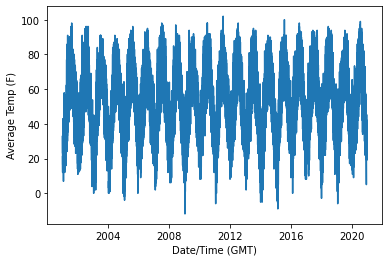

In [31]:
df_temps.head()
sns.lineplot(data=df_temps, x="Date/Time (GMT)", y="Average Temp (F)")

#### 34) Now, compute the mean of the hourly average temperature for each year plot this annual value. (HINT: The resample() method will again make this incredibly easy to do!)

<AxesSubplot:xlabel='Date/Time (GMT)', ylabel='Average Temp (F)'>

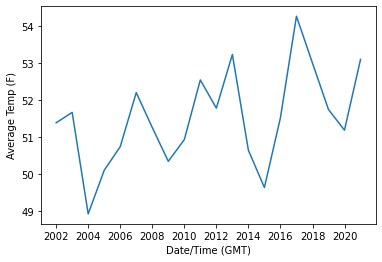

In [32]:
df_year_avg = df_temps['Average Temp (F)'].resample('Y').mean()
sns.lineplot(data=df_year_avg)